In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Roadmap
1. Read data
2. Check data information and statistical parameters
3. Visualize data
4. Performing simple linear regression
    * Build with stats model
     * Split the data into X and Y 
     * Split the data into Test and Train 
     * Build a linear model
     * Study the statistics of the model built
     * Residual Analysis(CHECK error Term distribution and pattern in residues)
     
    * Build with sklearn
    
5. Prdeiction on test set 
    * Check RMSE
    * Visualise the fit on test set

##  1. Read data

In [3]:
df = pd.read_csv("http://bit.ly/w-data")

## 2. Check data information and statistical parameters

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 3. Visualize data

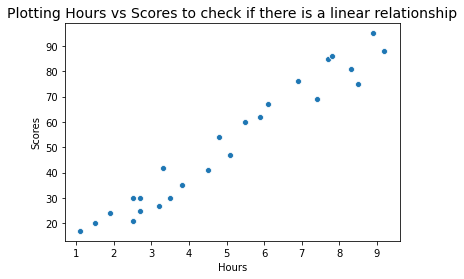

In [11]:
sns.scatterplot(data=df,x="Hours",y="Scores")
plt.title("Plotting Hours vs Scores to check if there is a linear relationship", fontsize= 14);

##### Observation
There is a linear relationship between Hours and Scores hence a linear model can be applied to predict scores based on hours.

## 4. Performing simple linear regression
Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 
𝑦  is the response
𝑐  is the intercept
𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature

In our case:
Score=𝑐+𝑚1×Hours
The  𝑚  values are called the model coefficients or model parameters.

###  Build model with stats model

#### Split the data into X and Y 

In [12]:
X= df.Hours
y=df.Scores

#### Split the data into Test and Train 
You now need to split our variable into training and testing sets. This is performed by importing train_test_split from the sklearn.model_selection library.  70% of the data is kept in the train dataset and the rest 30% in the test dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.70,random_state = 100)

In [17]:
X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

##  Build a linear model
import stats model to build the model

In [19]:
import statsmodels.api as sm

### Add a constant
By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, a constant has to be manually added using the add_constant attribute of statsmodels.

In [20]:
X_train_with_constant = sm.add_constant(X_train)

### use OLS module to build model

In [22]:
lr_model = sm.OLS(y_train,X_train_with_constant).fit()

In [23]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

### Study the statistics of the model built

In [24]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.15e-11
Time:                        11:56:06   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.8717 with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.957
Meaning that 95.7% of the variance in `Scores` is explained by `Hours`

This is a decent R-squared value.

###### 3.Probability( F statistic) has a very low value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.4951 + 9.8717 \times Hours $

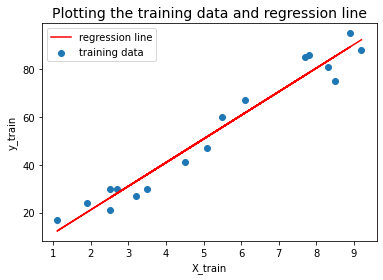

In [51]:
plt.scatter(X_train, y_train,label="training data")
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r',label ="regression line")
plt.title("Plotting the training data and regression line", fontsize =14)
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

## What will be the predicted score if the student studies for 9.25 Hrs/day?

In [29]:
Score = 1.4951 + 9.8717*9.25
Score

92.808325

The predicted score will be 92.81 if the student studies ofr 9.25 hours a day. 

In [31]:
lr_model.predict([1,9.25])

array([92.80850057])

## Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [33]:
y_train_pred = lr_model.predict(X_train_with_constant)
res = (y_train - y_train_pred)

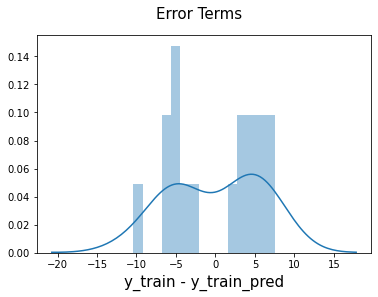

In [34]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

##### Observation
The residuals are following the normally distributed with a mean 0. Which is as expected by the linear regression model.

#### Looking for patterns in the residuals

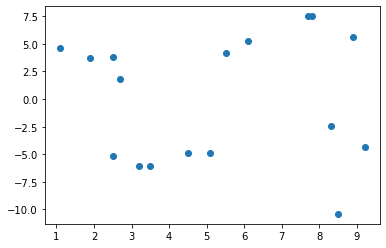

In [35]:
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set

Now that a regression line is fit on the train dataset, it's time to make some predictions on the test data. For this, first  constant has to be added to the `X_test` data like was done for `X_train`.
and then the y values are predicted corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [36]:
# Add a constant to X_test
X_test_with_constant = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr_model.predict(X_test_with_constant)

In [37]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [42]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160845

###### Checking the R-squared on the test set

In [43]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687437

##### Visualizing the fit on the test set

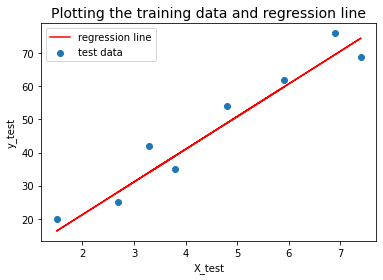

In [50]:
plt.scatter(X_test, y_test,label="test data")
plt.plot(X_test, y_pred, 'r', label="regression line")
plt.title("Plotting the training data and regression line", fontsize =14)
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.legend()
plt.show()